#Εργασία 3 - Συνδιασμός μοντέλων

Ονοματεπώνυμο: Καρλάκη Μαρία ΑΕΜ:244

Λήψη δεδομένων

Βιβλιοθήκες

In [1]:
import yfinance as yf
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df = df.drop(columns=["Volume", "Dividends", "Stock Splits"])
df

,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...,...
1252,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001


Δημιουργία γραφημάτων

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["Date"], y=df["Open"], mode="lines", name="Open"))
fig.add_trace(go.Scatter(x=df["Date"], y=df["High"], mode="lines", name="High"))
fig.add_trace(go.Scatter(x=df["Date"], y=df["Low"], mode="lines", name="Low"))
fig.add_trace(go.Scatter(x=df["Date"], y=df["Close"], mode="lines", name="Close"))

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Value",
    width=1320,
    height=700,
    hovermode="x unified"
)

fig.show()

Οι στατικές χρονοσειρές χαρακτηρίζονται απο σταθερό μέσο όρο και σταθερή διακύμανση στο χρόνο. Όμως στο line plot που βλέπουμε, παρατηρούμε οτι όλες οι μεταβλητές εμφανίζουν να έχουν τάση. Δηλαδή έχουν αύξηση απο το 2021 μέχρι τα μέσα 2022 και στη συνέχεια μείωση με πάλι κάποια αύξηση γύρω στο 2025. Η συμπεριφορά αυτή μας δείχνει οτι ο μέσος όρος δεν παραμένει σταθερός. Επίσης η μεγαλύτερη ένταση των τιμών σε κάποιες περιόδους, μας δείχνει οτι και η διακύμανση δεν είναι σταθερή. Επομένως οι χρονοσειρές είναι μη στατικές.

Ερώτημα 3

Εκπαιδεύοντας έναν Regressor σε μη στατικές χρονοσειρές μπορούν να προκύψουν σημαντικά προβλήματα εξαιτίας της μεταβλητότητας τους. Αρχικά αν το μοντέλο εκπαιδευτεί σε περίοδο ανοδικής τάσης, δεν θα μπορέσει να προβλέψει σωστά μια μελλοντική περίοδο πτώσης, οδηγώντας σε αναξιόπιστες προβλέψεις. Επιπλέον υπάρχει ο κίνδυνος το μοντέλο να μάθει απλώς τη γενική τάση της χρονοσειράς και να προβλέπει συνέχεια αύξηση ή μείωση επειδή αυτό συνέβη στο παρελθόν, χωρίς να συλλαμβάνει τον πραγματικό παράγοντα που επηρεάζει τις τιμές. Τέλος η ύπαρξη της τάσης μπορεί να οδηγήσει σε μη πραγματικές συσχετίσεις μεταξύ των μεταβλητών που κινούνται προς την ίδια κατεύθυνση, παρόλο που δεν υπάρχει πραγματική σχέση μεταξύ τους.

Ερώτημα 4

Από το γράφημα παρατηρείται ότι το δολάριο παρουσιάζει πτωτική τάση τον Ιούνιο του 2025 και στη συνέχεια σταθεροποιείται και σημειώνει ήπια ανοδική πορεία τον Ιούλιο του 2025. Η πτώση αυτή μπορεί να συνδέεται με προσδοκίες για μελλοντική μείωση των επιτοκίων από τη Federal Reserve, αρνητικό οικονομικό κλίμα ή αυξημένη αβεβαιότητα στις αγορές. Αντίθετα η ήπια ανάκαμψη τον Ιούλιο ενδέχεται να οφείλεται σε βελτίωση των οικονομικών προσδοκιών, σταθεροποίηση του επενδυτικού περιβάλλοντος ή αναθεώρηση των εκτιμήσεων σχετικά με την πορεία της νομισματικής πολιτικής.

Ερώτημα 5

Η συναλλαγματική αγορά επηρεάζεται από πλήθος εξωτερικών και απρόβλεπτων παραγόντων, οι οποίοι δεν αποτυπώνονται στα τέσσερα αυτά μεγέθη. Απροσδόκητα γεγονότα (πχ πολιτικές εξελίξεις, αποφάσεις της Fed, γεωπολιτικές κρίσεις), το επενδυτικό κλίμα και η ψυχολογία της αγοράς, καθώς και σημαντικοί οικονομικοί δείκτες (ΑΕΠ, πληθωρισμός, απασχόληση) καθορίζουν την πορεία του νομίσματος. Σύμφωνα και με τη Θεωρία της Αποδοτικής Αγοράς, οι τιμές αντικατοπτρίζουν τις διαθέσιμες πληροφορίες και η μελλοντική τους κίνηση είναι ουσιαστικά τυχαία. Επομένως ενώ μπορούν να χρησιμοποιηθούν στατιστικά ή μοντέλα μηχανικής μάθησης για πιθανές εκτιμήσεις, αυτές δεν αποτελούν ακριβή και βέβαιη συνάρτηση πρόβλεψης της τιμής close του δολαρίου.

Ερώτημα 6

Ο τυχαίος διαχωρισμός των δεδομένων δεν είναι κατάλληλος για χρονοσειρές, επειδή τα δεδομένα έχουν χρονική εξάρτηση. Οι τιμές από το παρελθόν επηρεάζουν αυτές από το μέλλον αλλά όχι το αντίστροφο. Στον τυχαίο διαχωρισμό είναι πιθανό το μοντέλο να εκπαιδευτεί με δεδομένα από το μέλλον και να χρησιμοποιηθούν για την πρόβλεψη δεδομένων, με αποτέλεσμα να φαίνεται πως έχει πολύ καλή απόδοση ενώ στην πραγματικότητα ήξερε την απάντηση. Αυτό οδηγεί σε μη ρεαλιστική αξιολόγηση. Για το λόγο αυτό ο σωστός τρόπος διαχωρισμού των δεδομένων σε χρονοσειρές είναι ο χρονολογικός. Δηλαδή πρώτα τα παλαιότερα δεδομένα για εκπαίδευση (train) και στη συνέχεια τα νεότερα για έλεγχο του μοντέλου (test).

Ερώτημα 7

In [5]:
train = df[df['Date'].dt.year < 2024].copy()
test = df[df['Date'].dt.year == 2024].copy()
train = train.drop(columns=["Date"])
test = test.drop(columns=["Date"])
train, test

(           Open        High         Low       Close
 0     92.570000   92.820000   92.180000   92.230003
 1     92.239998   92.959999   92.129997   92.730003
 2     92.760002   92.970001   92.599998   92.750000
 3     92.699997   93.209999   92.610001   93.040001
 4     93.010002   93.139999   92.779999   92.959999
 ..          ...         ...         ...         ...
 786  101.760002  101.900002  101.430000  101.699997
 787  101.650002  101.769997  101.449997  101.470001
 788  101.550003  101.570000  100.830002  100.989998
 789  100.870003  101.300003  100.620003  101.230003
 790  101.199997  101.419998  101.070000  101.330002
 
 [791 rows x 4 columns],
             Open        High         Low       Close
 791   101.419998  102.250000  101.339996  102.199997
 792   102.150002  102.730003  102.080002  102.459999
 793   102.459999  102.529999  102.150002  102.419998
 794   102.400002  103.099998  101.910004  102.410004
 795   102.440002  102.620003  102.080002  102.209999
 ...         

Ερώτημα 8

Η συνάρτηση create_timeframes μετατρέπει τα δεδομένα σε κατάλληλη μορφή για πρόβλεψη των χρονοσειρών από N συνεχόμενες μέρες (με τις τιμές Open, High, Low και Close) και τα αντίστοιχα Targets, που είναι η τιμή Close της επόμενης ημέρας.

In [6]:
def create_timeframes(df, N):
    X = []
    y = []
    for i in range(len(df) - N):
        X.append(df.iloc[i:i+N].values)
        y.append(df.iloc[i+N]["Close"])
    return np.array(X), np.array(y)

Διαχωρισμός των δεδομένων σε Train - Test και δημιουργία Timeframes (προαιρετικά)

In [7]:
N = 3
X_train, y_train = create_timeframes(train, N)
X_test, y_test = create_timeframes(test, N)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (788, 3, 4) (788,)
Test shapes: (249, 3, 4) (249,)


Ερώτημα 9

Αν θέλουμε να προβλέψουμε μόνο την επόμενη μέρα το μέγεθος του timeframe
N προτιμάται να είναι μικρό. Αυτό συμβαίνει επειδή οι πιο πρόσφατες μέρες έχουν μεγαλύτερη επίδραση στην τιμή της επόμενης ημέρας, ενώ η υπερβολική αύξηση του
Ν μπορεί να εισάγει θόρυβο και να δυσκολέψει το μοντέλο να εντοπίσει τα σημαντικά μοτίβα. Ωστόσο όταν θέλουμε να προβλέψουμε έναν πιο μακρινό χρονικό ορίζοντα τότε είναι προτιμότερο το Ν να είναι μεγαλύτερο, για να αποτυπώνονται οι μακροπρόθεσμες τάσεις και τα εποχικά μοτίβα που δεν φαίνονται σε μικρά χρονικά διαστήματα.

Ερώτημα 10

In [8]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
N = 5

X_train, y_train = create_timeframes(train, N)
X_test, y_test = create_timeframes(test, N)

X_train = X_train.reshape(X_train.shape[0], N * 4)
X_test = X_test.reshape(X_test.shape[0], N * 4)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

print("\n1ο input του X_train:\n", X_train[0])

Train shapes: (786, 20) (786,)
Test shapes: (247, 20) (247,)

1ο input του X_train:
 [92.57 92.82 92.18 92.23 92.24 92.96 92.13 92.73 92.76 92.97 92.60 92.75
 92.70 93.21 92.61 93.04 93.01 93.14 92.78 92.96]


Ερώτημα 11

α) Εκπαίδευση με Linear Regression

In [9]:
linearR = LinearRegression()
linearR.fit(X_train, y_train)

y_pred_train_lin = linearR.predict(X_train)
y_pred_test_lin  = linearR.predict(X_test)

mae_train_linearR = mean_absolute_error(y_train, y_pred_train_lin)
mae_test_linearR  = mean_absolute_error(y_test,  y_pred_test_lin)

print(f"Linear Regression — MAE train: {mae_train_linearR:.4f} | MAE test: {mae_test_linearR:.4f}")

Linear Regression — MAE train: 0.3458 | MAE test: 0.2846


β) Εκπαίδευση με Random Forest Regressor

In [10]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf  = mean_absolute_error(y_test,  y_pred_test_rf)

print(f"Random Forest — MAE train: {mae_train_rf:.4f} | MAE test: {mae_test_rf:.4f}")

Random Forest — MAE train: 0.1454 | MAE test: 0.3209


γ) Bagging Regressor χρησιμοποιώντας Linear Regression

In [11]:
bag_linearR = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bag_linearR.fit(X_train, y_train)

y_pred_train_bag = bag_linearR.predict(X_train)
y_pred_test_bag  = bag_linearR.predict(X_test)

mae_train_bag = mean_absolute_error(y_train, y_pred_train_bag)
mae_test_bag  = mean_absolute_error(y_test,  y_pred_test_bag)

print(f"Bagging(LinearRegression) — MAE train: {mae_train_bag:.4f} | MAE test: {mae_test_bag:.4f}")

Bagging(LinearRegression) — MAE train: 0.3459 | MAE test: 0.2850


δ) Blr

In [12]:
blr = BayesianRidge()
blr.fit(X_train, y_train)

y_pred_train_blr = blr.predict(X_train)
y_pred_test_blr  = blr.predict(X_test)

mae_train_blr = mean_absolute_error(y_train, y_pred_train_blr)
mae_test_blr  = mean_absolute_error(y_test,  y_pred_test_blr)

print(f"BLR — MAE train: {mae_train_blr:.4f} | MAE test: {mae_test_blr:.4f}")

BLR — MAE train: 0.3457 | MAE test: 0.2849


ε) Stacking Regressor με Linear Regression και Decision Tree

In [13]:
estimators = [
    ("LinearR", LinearRegression()),
    ("DecisionT", DecisionTreeRegressor(random_state=42, max_depth=8))
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    n_jobs=-1,
    passthrough=False
)
stack.fit(X_train, y_train)

y_pred_train_stack = stack.predict(X_train)
y_pred_test_stack  = stack.predict(X_test)

mae_train_stack = mean_absolute_error(y_train, y_pred_train_stack)
mae_test_stack  = mean_absolute_error(y_test,  y_pred_test_stack)

print(f"Stacking(LR & Decision Tree) — MAE train: {mae_train_stack:.4f} | MAE test: {mae_test_stack:.4f}")


Stacking(LR & Decision Tree) — MAE train: 0.3492 | MAE test: 0.2858


Γράφημα σύγκρισης MAE

Δημιουργία πίνακα με τα αποτελέσματα των train και test

In [14]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Bagging (LinearReg)",
        "Bayesian Linear Reg.",
        "Stacking (LR + Tree)"
    ],
    "MAE Train": [
        mae_train_linearR, mae_train_rf, mae_train_bag, mae_train_blr, mae_train_stack
    ],
    "MAE Test": [
        mae_test_linearR, mae_test_rf, mae_test_bag, mae_test_blr, mae_test_stack
    ]
})

display(results)

,Model,MAE Train,MAE Test
0,Linear Regression,0.345752,0.284560
1,Random Forest,0.145439,0.320871
2,Bagging (LinearReg),0.345907,0.284992
3,Bayesian Linear Reg.,0.345667,0.284904
4,Stacking (LR + Tree),0.349218,0.285823


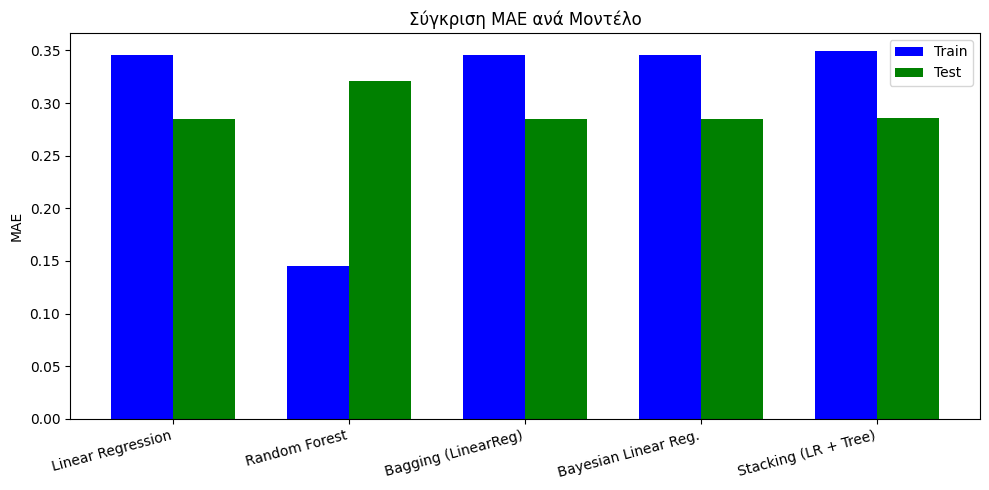

In [15]:
labels = results["Model"].tolist()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, results["MAE Train"], width, label="Train", color="blue")
ax.bar(x + width/2, results["MAE Test"],  width, label="Test",  color="green")

ax.set_ylabel("MAE")
ax.set_title("Σύγκριση MAE ανά Μοντέλο")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

Πως λειτουργεί το κάθε μοντέλο

Linear Regression: Αυτό το μοντέλο βρίσκει την καλύτερη ευθεία γραμμή που ταιριάζει στα δεδομένα, ελαχιστοποιώντας το άθροισμα των τετραγώνων των αποστάσεων από κάθε σημείο δεδομένων σε αυτή τη γραμμή. Στη συνέχεια αυτή η γραμμή χρησιμοποιείται για να προβλέψει νέες τιμές.

Random Forest: Δημιουργεί ένα πλήθος από δέντρα αποφάσεων. Κάθε δέντρο εκπαιδεύεται σε ένα τυχαίο υποσύνολο των δεδομένων. Η τελική πρόβλεψη προκύπτει από τον μέσο όρο των προβλέψεων όλων των δέντρων, με αποτέλεσμα να βελτιώνεται η ακρίβεια και να μειώνεται η υπερπροσαρμογή.

Bagging (LinearReg): Λειτουργεί με τη δημιουργία πολλαπλών υποσυνόλων των δεδομένων εκπαίδευσης μέσω τυχαίας δειγματοληψίας με αντικατάσταση. Στη συνέχεια εκπαιδεύει το μοντέλο (στη συγκεκριμένη περίπτωση με Γραμμική Παλινδρόμηση) σε κάθε υποσύνολο και συνδυάζει τις προβλέψεις τους (συνήθως παίρνοντας τον μέσο όρο) για να δημιουργήσει μια τελική και ακριβή πρόβλεψη.

BLR: Αυτή η προσέγγιση της γραμμικής παλινδρόμησης δεν δίνει μια μοναδική, σταθερή εκτίμηση για τις παραμέτρους του μοντέλου. Αντίθετα χρησιμοποιεί τον κανόνα του Bayes για να υπολογίσει κατανομές πιθανότητας για κάθε παράμετρο. Έτσι το μοντέλο παρέχει όχι μόνο μια πρόβλεψη αλλά και μια εκτίμηση της αβεβαιότητας γύρω από αυτήν την πρόβλεψη.

Stacking: Εκπαιδεύονται πολλά βασικά μοντέλα (σε αυτή την περίπτωση Γραμμική Παλινδρόμηση και Δέντρα Απόφασης). Οι προβλέψεις από αυτά τα μοντέλα χρησιμοποιούνται ως νέα χαρακτηριστικά (input) για ένα τελικό μοντέλο ο οποίος μαθαίνει πώς να συνδυάζει τις προβλέψεις τους με τον καλύτερο δυνατό τρόπο για να δώσει την τελική έξοδο.